In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames
import sunpy.coordinates
import astropy.units as u
import math


%matplotlib widget

/home/jay/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data_strong = pd.read_csv('/home/jay/BUTTERFLY/DATA/strong (Copy).csv')

ds = data_strong.dropna(subset=['  X (")','  Y (")', 'Date       Peak           (UT)', 'Brightness(K)', 'Position'])
X_strong = ds['  X (")'] #arcsec
Y_strong = ds['  Y (")'] #arcsec
BS =ds['Brightness(K)']
DATE_strong = ds['Date       Peak           (UT)'] #DATE-TIME

In [3]:
data_weak = pd.read_csv('/home/jay/BUTTERFLY/DATA/weak.csv')

dw = data_weak.dropna(subset=['  X (")','  Y (")', 'Date       Peak           (UT)', 'Brightness(K)', 'Position'])
X_weak = dw['  X (")'] #arcsec
Y_weak = dw['  Y (")'] #arcsec
BW =dw['Brightness(K)']
DATE_weak = dw['Date       Peak           (UT)'] #DATE-TIME

In [4]:
832 +1790

2622

/tmp/ipykernel_11551/2646293699.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axis.legend(loc = 'best')


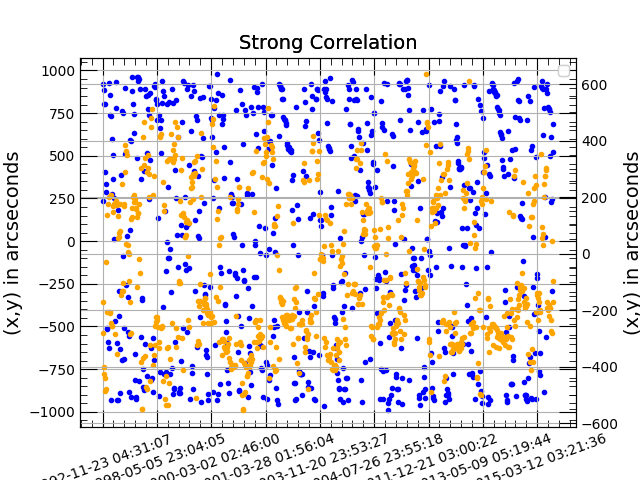

In [5]:
fig, ax = plt.subplots()

ax2 =ax.twinx()
ax.scatter(DATE_strong, X_strong, c='blue', marker='.')
ax2.scatter(DATE_strong, Y_strong,c='orange', marker='.')

specific_ticks = DATE_strong[::100]

for axis in ax, ax2:
    axis.set_xticks(specific_ticks)
    axis.xaxis.set_minor_locator(AutoMinorLocator())
    axis.yaxis.set_minor_locator(AutoMinorLocator())
    axis.tick_params(direction='in', length = 12, which ='major', top=True, right=True)
    axis.tick_params(direction='in', length = 5, which ='minor', top=True, right=True)
    axis.tick_params(axis='y')
    axis.tick_params(axis='x', rotation=20)
    axis.set_ylabel("(x,y) in arcseconds", fontsize = 14)
    axis.set_title("Strong Correlation", fontsize = 14)
    axis.legend(loc = 'best')
    axis.grid(True)

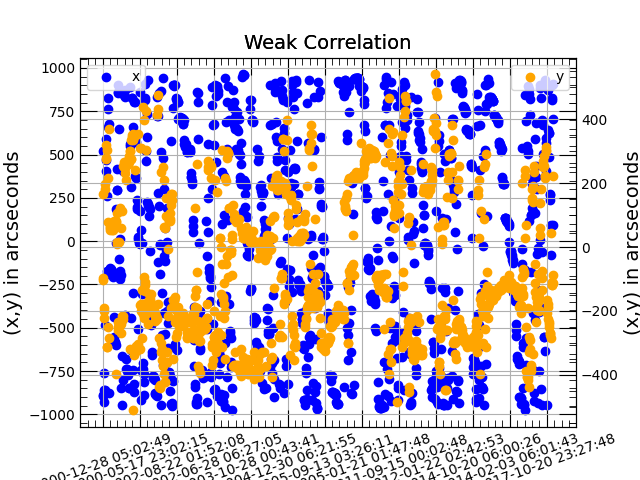

In [6]:
fig, ax = plt.subplots()

ax2 =ax.twinx()
ax.scatter(DATE_weak, X_weak, color = 'blue', label='x')
ax2.scatter(DATE_weak, Y_weak, color = 'orange', label='y')

specific_ticks = DATE_weak[::100]

for axis in ax, ax2:
    axis.set_xticks(specific_ticks)
    axis.xaxis.set_minor_locator(AutoMinorLocator())
    axis.yaxis.set_minor_locator(AutoMinorLocator())
    axis.tick_params(direction='in', length = 12, which ='major', top=True, right=True)
    axis.tick_params(direction='in', length = 5, which ='minor', top=True, right=True)
    axis.tick_params(axis='y')
    axis.tick_params(axis='x', rotation=20)
    axis.set_ylabel("(x,y) in arcseconds", fontsize = 14)
    axis.set_title("Weak Correlation", fontsize = 14)
    axis.legend(loc = 'best')
    axis.grid(True)

In [7]:
DATE_strong = pd.to_datetime(DATE_strong)# Convert DATE_strong to a datetime series
datas = pd.DataFrame({'Date': DATE_strong})# Create a DataFrame
datas['Year'] = datas['Date'].dt.year# Extract the year from the date

DATE_weak = pd.to_datetime(DATE_weak)# Convert DATE_weak to a datetime series
dataw = pd.DataFrame({'Date': DATE_weak})# Create a DataFrame
dataw['Year'] = dataw['Date'].dt.year# Extract the year from the date

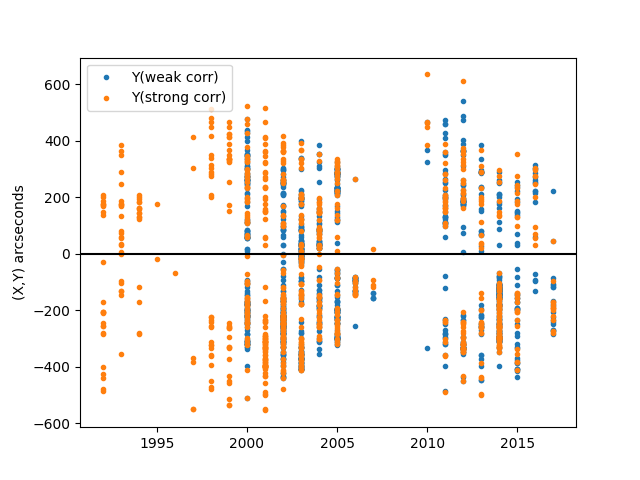

In [8]:
fig, ax =plt.subplots()
#ax2 = ax.twinx()
ax.scatter(dataw['Year'], Y_weak, marker='.', label = 'Y(weak corr)')
ax.scatter(datas['Year'], Y_strong, marker='.', label = 'Y(strong corr)')
#ax.scatter(dataw['Year'], X_weak, marker='.', label = 'X(weak corr)', alpha =0.1)
#ax.scatter(datas['Year'], X_strong, marker='.', label = 'X(strong corr)', alpha =0.1)

ax.set_ylabel('(X,Y) arcseconds')

ax.axhline(0, c='black')
ax.legend()

Text(0.5, 1.0, 'Histogram of events (yearwise)')

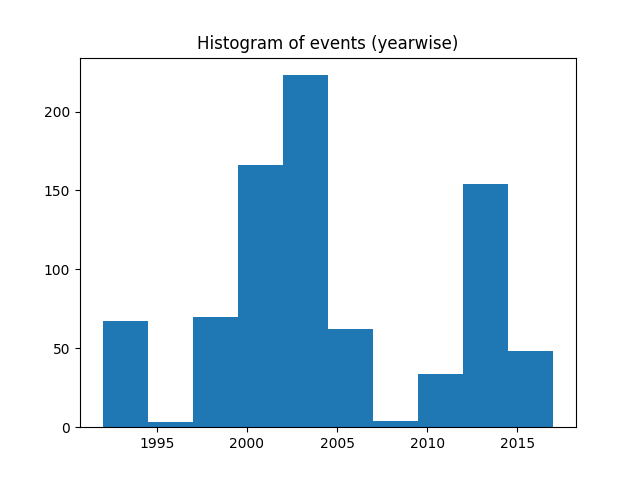

In [9]:
plt.figure()
plt.hist(datas['Year'])
plt.title('Histogram of events (yearwise)')

/tmp/ipykernel_11551/782744849.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


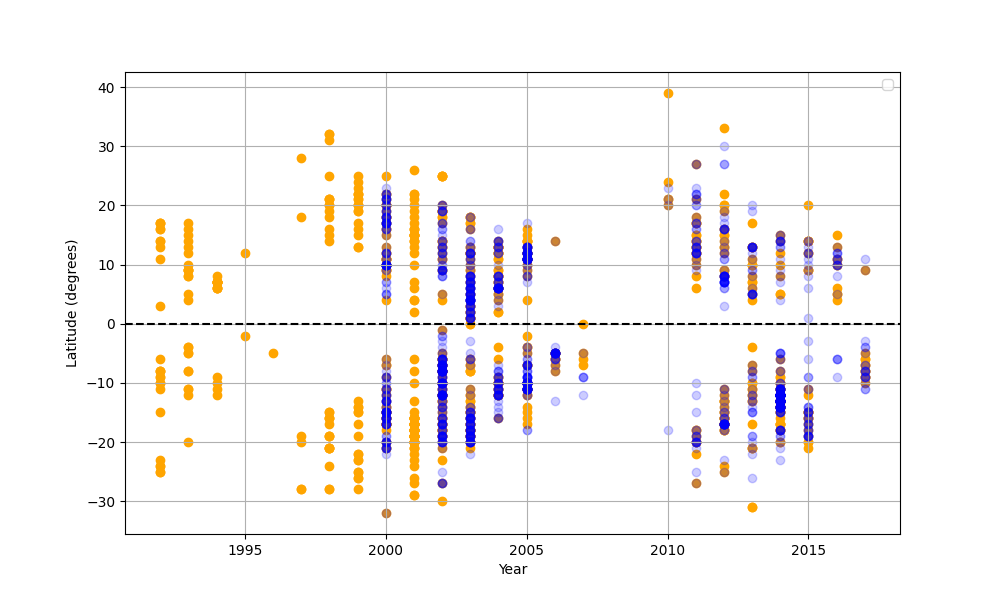

In [10]:
dfs = pd.DataFrame(ds['Position'])
dfw = pd.DataFrame(dw['Position'])

def convert_coordinates(coord):
    lat = int(coord[1:3]) * (-1 if coord[0] == 'S' else 1) 
    '''coord[1:3] extracts the degree part of the latitude. The latitude is multiplied by -1 
    if the first character is 'S' (indicating South), making it negative. If it's 'N' (North), it remains positive.'''
    lon = int(coord[4:6]) * (-1 if coord[3] == 'W' else 1)  
    '''coord[4:6] extracts the degree part of the longitude. 
    Similar logic is applied for longitude, making it negative if the fourth character is 'W' (West) and positive if it's 'E' (East).'''
    return lat, lon

dfs[['Latitude', 'Longitude']] = dfs['Position'].apply(convert_coordinates).apply(pd.Series)
dfw[['Latitude', 'Longitude']] = dfw['Position'].apply(convert_coordinates).apply(pd.Series)

plt.figure(figsize=(10, 6))
plt.scatter(datas['Year'], dfs['Latitude'], c='Orange', marker='o')
plt.scatter(dataw['Year'], dfw['Latitude'], c='blue', marker='o', alpha = 0.2)
plt.xlabel('Year')
plt.ylabel('Latitude (degrees)')
plt.axhline(0, color='black', linestyle='--')
plt.grid()
plt.legend()
plt.show()
